# ExtraaLearn Project
***Marks: 60***

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated regularly, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interact with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of the profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about the program through email, Representative shared information with a lead like a brochure of program, etc 
    * Phone Activity: Had a Phone Conversation with a representative, Had conversation over SMS with a representative, etc
    * Website Activity: Interacted on live chat with a representative, Updated profile on the website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


# To tune different models
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Import Dataset

In [2]:
learn = pd.read_csv("ExtraaLearn.csv") 

In [3]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()

### View the first and last 5 rows of the dataset

In [4]:
data.head() 

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [5]:
data.tail() 

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


### Understand the shape of the dataset

In [6]:
data.shape 

(4612, 15)

### Check the data types of the columns for the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

- There are **4612 observations and 15 columns** in the data.
- All the columns have 4612 non-null value, i.e., there are **no missing values** in the dataset.

In [8]:
# checking for duplicate values
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [9]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


In [10]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4612,4612,EXT001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,4612.00000,NaN,NaN,NaN,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
current_occupation,4612,3,Professional,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,4612,2,Website,2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,4612,3,High,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,4612.00000,NaN,NaN,NaN,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,NaN,NaN,NaN,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,NaN,NaN,NaN,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
last_activity,4612,3,Email Activity,2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,4612,2,No,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# checking the number of unique values
data["ID"].nunique() 

4612

In [12]:
data.drop(["ID"], axis=1, inplace=True) 

In [13]:
#convert object to categoricalvariable
cols_cat = data.select_dtypes(['object']).columns.tolist()

for col in cols_cat:
    data[col]=data[col].astype('category')

In [14]:
#Verify if the object type data has is converted to category type data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    4612 non-null   int64   
 1   current_occupation     4612 non-null   category
 2   first_interaction      4612 non-null   category
 3   profile_completed      4612 non-null   category
 4   website_visits         4612 non-null   int64   
 5   time_spent_on_website  4612 non-null   int64   
 6   page_views_per_visit   4612 non-null   float64 
 7   last_activity          4612 non-null   category
 8   print_media_type1      4612 non-null   category
 9   print_media_type2      4612 non-null   category
 10  digital_media          4612 non-null   category
 11  educational_channels   4612 non-null   category
 12  referral               4612 non-null   category
 13  status                 4612 non-null   int64   
dtypes: category(9), float64(1), int64(4)
mem

In [15]:
#Check unique value of category type data
data.select_dtypes(['category']).nunique()

current_occupation      3
first_interaction       2
profile_completed       3
last_activity           3
print_media_type1       2
print_media_type2       2
digital_media           2
educational_channels    2
referral                2
dtype: int64

In [16]:
# Checking the count of unique values in each categorical column, using percentage to express
cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts(normalize = True).round(2))
    print('*'*40)

Unique values in current_occupation are :
current_occupation
Professional   0.57000
Unemployed     0.31000
Student        0.12000
Name: proportion, dtype: float64
****************************************
Unique values in first_interaction are :
first_interaction
Website      0.55000
Mobile App   0.45000
Name: proportion, dtype: float64
****************************************
Unique values in profile_completed are :
profile_completed
High     0.49000
Medium   0.49000
Low      0.02000
Name: proportion, dtype: float64
****************************************
Unique values in last_activity are :
last_activity
Email Activity     0.49000
Phone Activity     0.27000
Website Activity   0.24000
Name: proportion, dtype: float64
****************************************
Unique values in print_media_type1 are :
print_media_type1
No    0.89000
Yes   0.11000
Name: proportion, dtype: float64
****************************************
Unique values in print_media_type2 are :
print_media_type2
No    0.950

**Observations :**

- current_occupation : 57% are Professional, 31% are Unemployed, 12% are Students.
- first_interaction : 55% by Website, 45% by Mobile App.
- profile_completed : 49% High completion, 49% Medium  completion, 2% Low completion.
- last_activity : 49% Email Activity, 27% Phone Activity, 24% Website Activity.
- print_media_type1 (Newspaper) : 89%  No, 11% Yes.
- print_media_type2 (Magazine) : 95% No, 5% Yes.
- digital_media (Digital Platform) : 89% No, 11% Yes.
- educational_channels : 85% No, 15% Yes.
- referral : 98% No, 2% Yes.

### Univariate Analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    boxplot=sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column

    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    # Display mean value next to the mean line
    plt.text(data[feature].mean(), 10, 
    f'Mean: {data[feature].mean():.2f}', color='black', verticalalignment='bottom', horizontalalignment='left')
    # Display mean value next to the median line
    plt.text(data[feature].median(), 50, 
    f'Median: {data[feature].median():.2f}', color='black', verticalalignment='bottom', horizontalalignment='left')
    
    # Calculate quartiles
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    
    IQR=Q3-Q1 # IQR Range
    Lower_Whisker =Q1-1.5*IQR  #define lower whisker
    Upper_Whisker = Q3+1.5*IQR  # define upper Whisker
    
    # Add Q1, Q3, and median lines
    plt.axvline(Q1, color='red', linestyle='dashed', linewidth=2, label='Q1')
    plt.axvline(Q3, color='blue', linestyle='dashed', linewidth=2, label='Q3')

    # Display Q1, Q3, and median values
    plt.text(Q1, 1, f'Q1: {Q1:.2f}', color='black', verticalalignment='bottom', horizontalalignment='left')
    plt.text(Q3, 1, f'Q3: {Q3:.2f}', color='black', verticalalignment='bottom', horizontalalignment='left')
    
    # Display Max and Min
    plt.text(data[feature].min(), 100, f'Min: {data[feature].min():.2f}', color='black', verticalalignment='bottom', horizontalalignment='left')
    plt.text(data[feature].max(), 100, f'Max: {data[feature].max():.2f}', color='black', verticalalignment='bottom', horizontalalignment='left')


### Observations on age

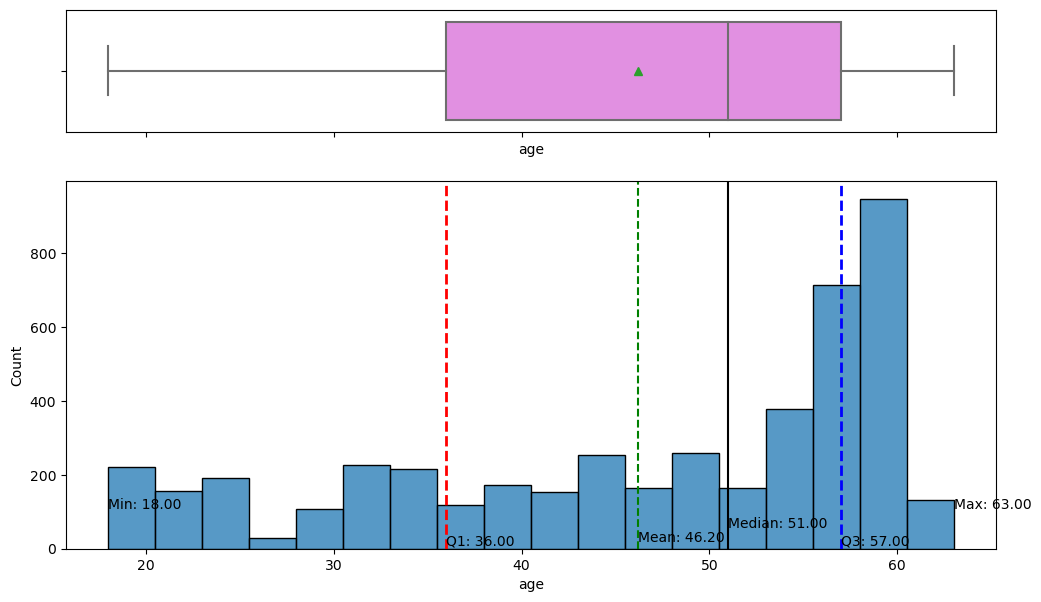

In [18]:
histogram_boxplot(data, "age") 

**Observations :**

- Age is left-skewed and has a range  from **18** to **63** with a peak around **60**. **50%** of the data is distributed between **Q1 : 36 and Q3 : 57**. The mean is **46.2** and the median is **51**. There is no outlier.

### Observations on website_visits

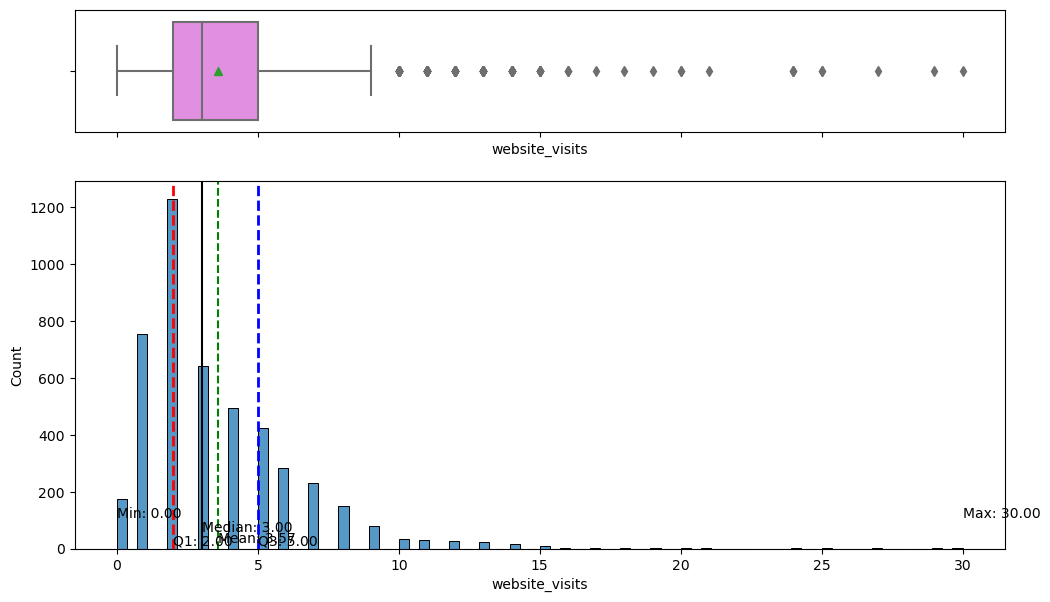

In [19]:
histogram_boxplot(data,"website_visits")

**Observations :**

- Website_visits is right-skewed and has a range  from **0** to **30** with a peak around Q1 : **2**. **50%** of the data is distributed between **Q1 : 2 and Q3 : 5**. The mean is **3.57** and the median is **3**. There are outliers beside the Upper_Whisker **9.5**. Seems that many lead took their decision very quickly.

In [20]:
# To check how many leads have not visited web-site
data[data["website_visits"] == 0].shape

(174, 14)

**Observations :**

- There are **174** leads who hadn't visited the website.

### Observations on number of time_spent_on_website

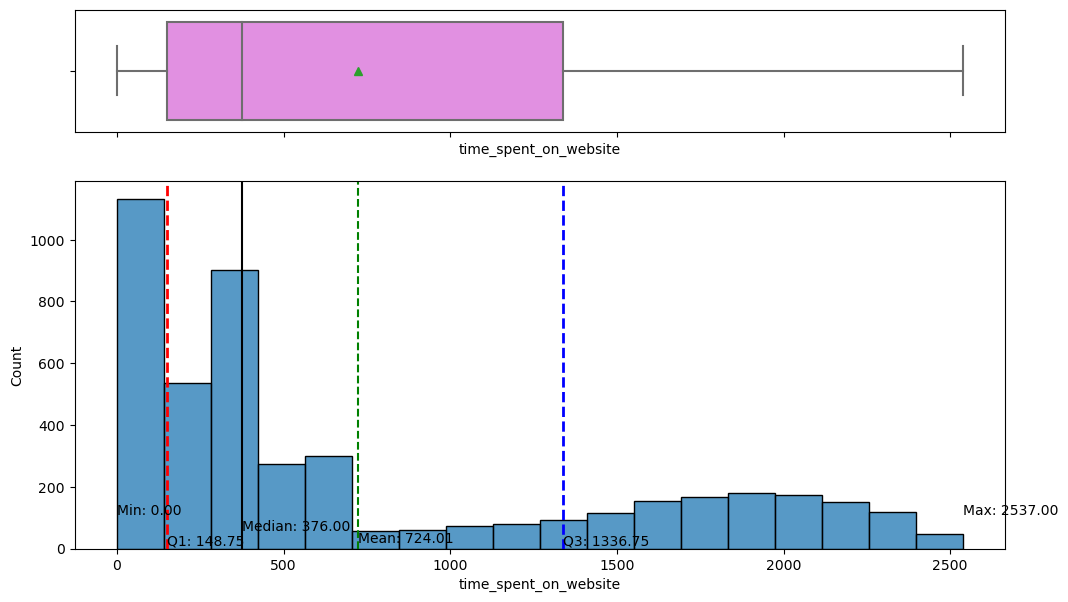

In [21]:
histogram_boxplot(data,"time_spent_on_website") 

**Observations :**

- Time_spent_on_website is right-skewed and has a large range  from **0** to **2537** with two peaks, one is to the left of Q1 : **148.75**, the other is around the median : **376**. **50%** of the data is distributed between **Q1 : 148.75 and Q3 : 1336.75**. The mean is **724** and the median is **376**. there is no outlier.

### Observations on number of page_views_per_visit

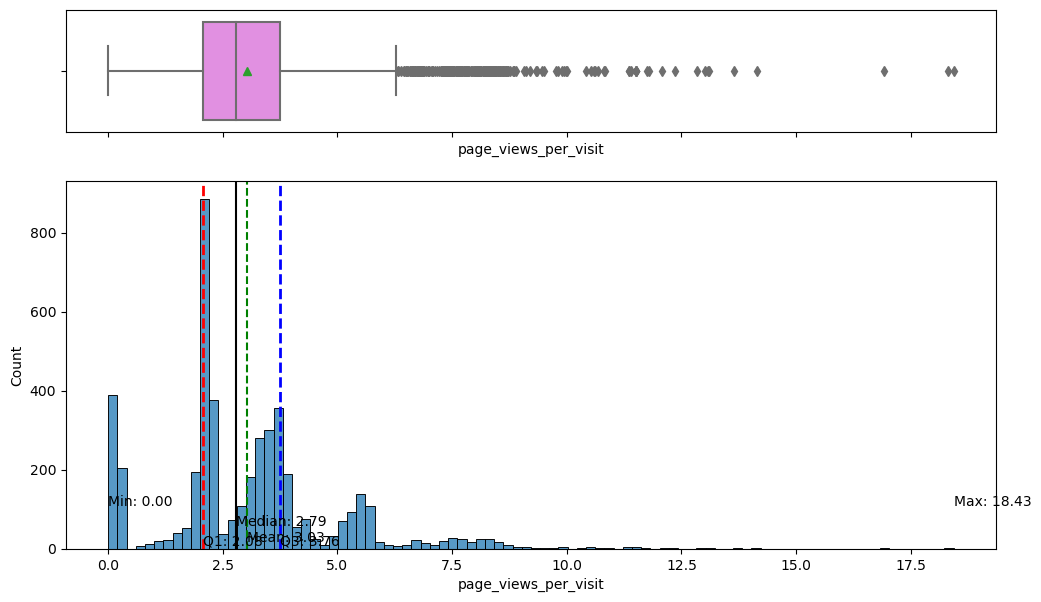

In [22]:
histogram_boxplot(data,"page_views_per_visit")

**Observations :**

- Page_views_per_visit is right-skewed and has a range  from **0** to **18.43** with several peaks:around **0**, around the Q1 : **2.1**, and around the Q3: **3.76**. **50%** of the data is distributed between **Q1  and Q3**. The mean is **3.03** and the median is **2.79**. There are many outliers beside the Upper_Whisker **6.27**.

In [23]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on current_occupation

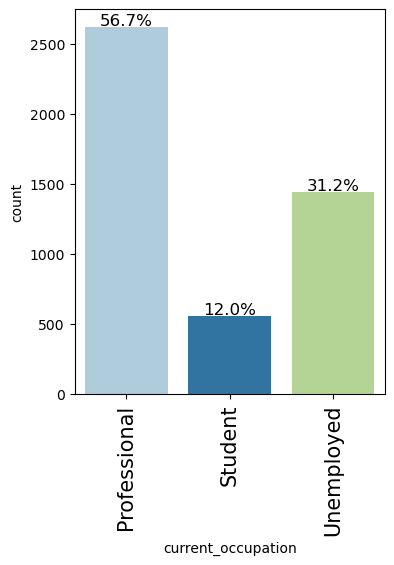

In [24]:
labeled_barplot(data, "current_occupation", perc=True)

**Observations :**

- Current_occupation : 57% were Professional, 31% were Unemployed, 12% were Students.

### Observations on number of first_interaction

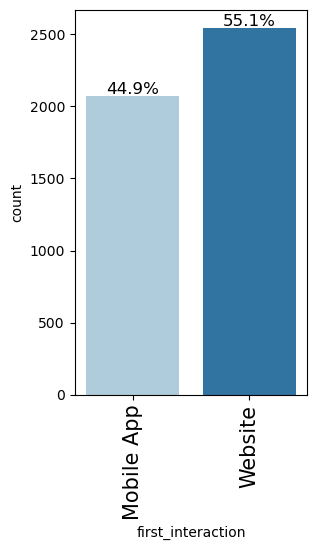

In [25]:
labeled_barplot(data,"first_interaction",perc=True) 

**Observations :**

- First_interaction : 55% by Website, 45% by Mobile App.

### Observations on profile_completed

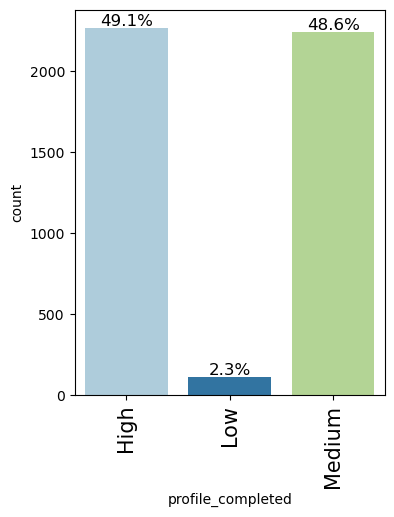

In [26]:
labeled_barplot(data,"profile_completed",perc=True) 

**Observations :**

- Profile_completed : 49.1% High completion, 48.6% Medium  completion, 2.3% Low completion.

### Observations on last_activity

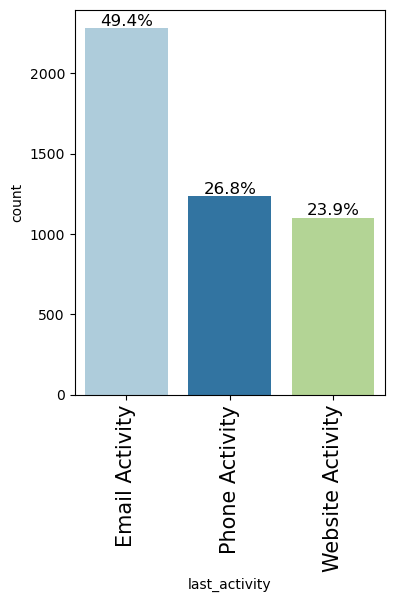

In [27]:
labeled_barplot(data,"last_activity",perc=True) 

**Observations :**

- Last_activity : 49.4% Email Activity, 26.8% Phone Activity, 23.9% Website Activity.

### Observations on print_media_type1

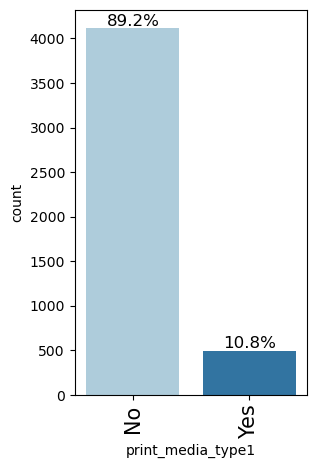

In [28]:
labeled_barplot(data,"print_media_type1",perc=True) 

**Observations :**

- Print_media_type1 (Newspaper) : 89.2%  hadn't seen the ad of ExtraaLearn in the Newspaper. 10.8% had seen the ad in the Newspaper.

### Observations on print_media_type2

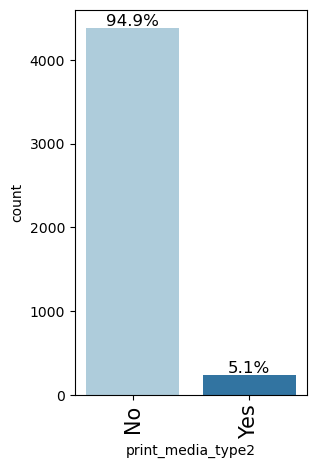

In [29]:
labeled_barplot(data,"print_media_type2",perc=True) 

**Observations :**

- Print_media_type2 (Magazine) : 94.9%  hadn't seen the ad of ExtraaLearn in the Magazine. 5.1% had seen the ad in the Magazine.

### Observations on digital_media

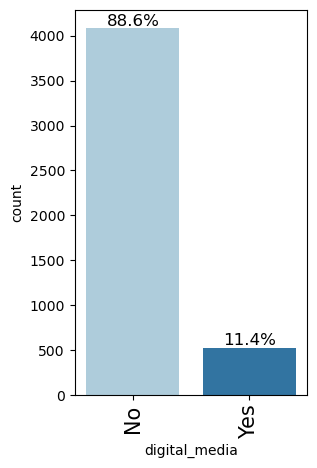

In [30]:
labeled_barplot(data,"digital_media",perc=True) 

**Observations :**

- Print_media_type1 (Newspaper) : 88.6%  hadn't seen the ad of ExtraaLearn in the digital platforms. 11.4% had seen the ad in the digital platforms.

### Observations on educational_channels

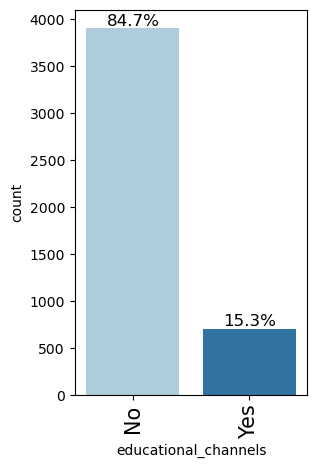

In [31]:
labeled_barplot(data,"educational_channels",perc=True) 

**Observations :**

- Educational_channels : 84.7% hadn't heard about ExtraaLearn in the education channels, 15.3% had heard about ExtraaLearn in the education channels.

### Observations on referral

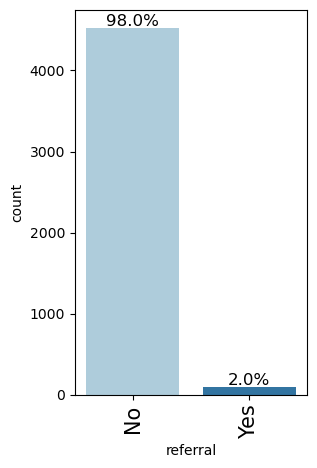

In [32]:
labeled_barplot(data,"referral",perc=True) 

**Observations :**

- Referral : 98% hadn't heard about ExtraaLearn through reference, 2% had heard about ExtraaLearn through reference.

### Observations on status

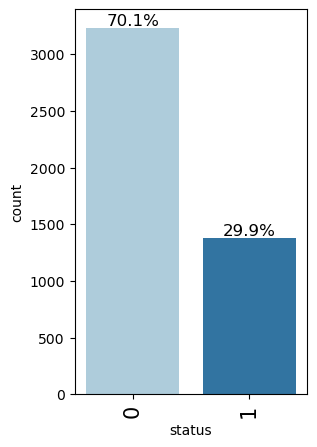

In [33]:
labeled_barplot(data,"status",perc=True) 

**Observations :**

- Status : 70.1% were not converted to paid customer, 29.9% were converted to paid customer.

**Observations from Univariate Analysis :**

- 29.9% of the leads were converted to paid customers.
- The company use newspaper, magazine, digital platforms,education and reference as channels to touch the clients. It can be interesting to check which channels give higher percentage of convertion. 
- The occupation can also be an interesting element to breakdown the population and see which population has higher percentage of convertion.


### Bivariate Analysis

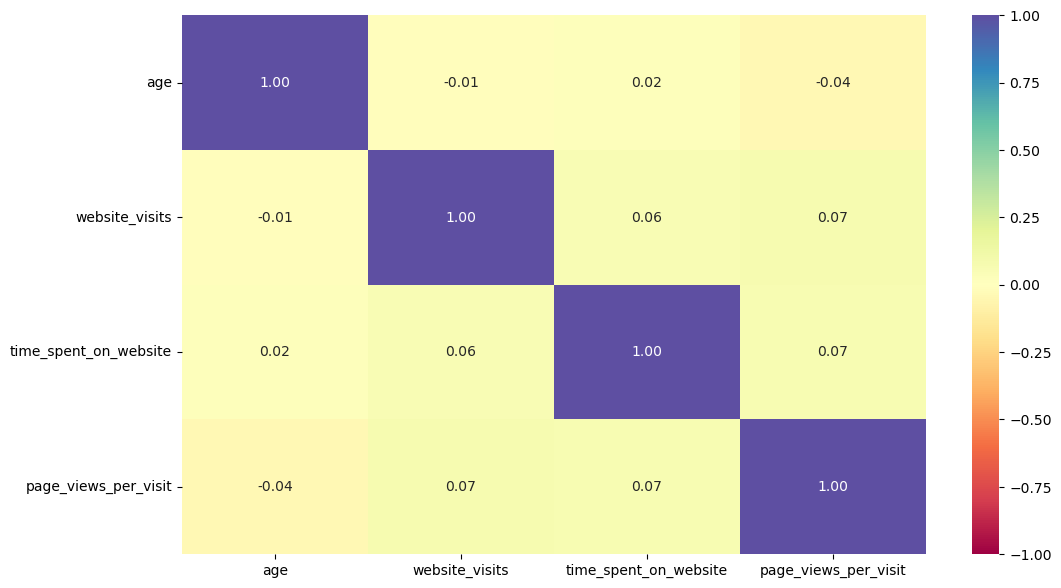

In [34]:
#cols_list = data.select_dtypes(include=np.number).columns.tolist()
cols_list = ['age', 'website_visits', 'time_spent_on_website','page_views_per_visit']

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations :**
- There is no evident correlation.

**Creating functions that will help us with further analysis.**

In [35]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [36]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    print(tab)
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Leads will have different expectations from the outcome of the course and the current occupation may play a key role for them to take the program. Let's analyze it**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------
status                   0       1
current_occupation                
Professional       0.64488 0.35512
Unemployed         0.73421 0.26579
Student            0.88288 0.11712


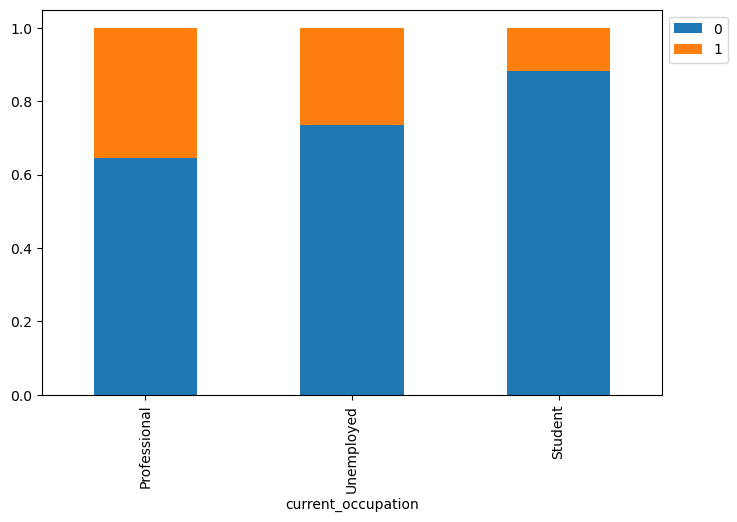

In [37]:
stacked_barplot(data, "current_occupation", "status")

**Observations :**

- Among Professionals, **35.5%** were converted to paid customers.
- Among Unemployeds, **26.6%** were converted to paid customers.
- Among Students, **11.7%** were converted to paid customers.

**There is a higher proportion of conversion among the professionals.**

**Age can be a good factor to differentiate between such leads**

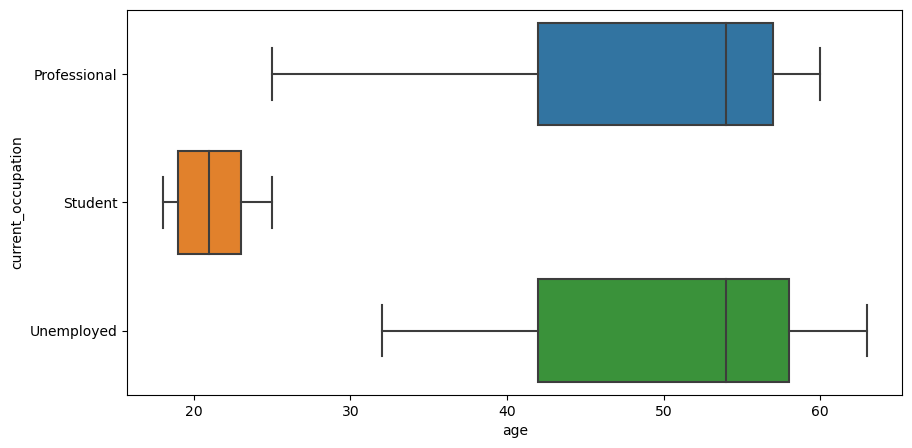

In [38]:
plt.figure(figsize=(10, 5))
ax=sns.boxplot(data, x='age',y='current_occupation')
     
plt.show()


In [39]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


**Observations**

- Among the Professionals, 50% of their age are distributed between Q1:42 and Q3:57.
- Among the Unemployeds, 50% of their age are distributed between Q1:42 and Q3:58.
- Among the Student, 50% of their age are distributed between Q1:19 and Q3:23.


**The company's first interaction with leads should be compelling and persuasive. Let's see if the channels of the first interaction have an impact on the conversion of leads**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------
status                  0       1
first_interaction                
Website           0.54406 0.45594
Mobile App        0.89469 0.10531


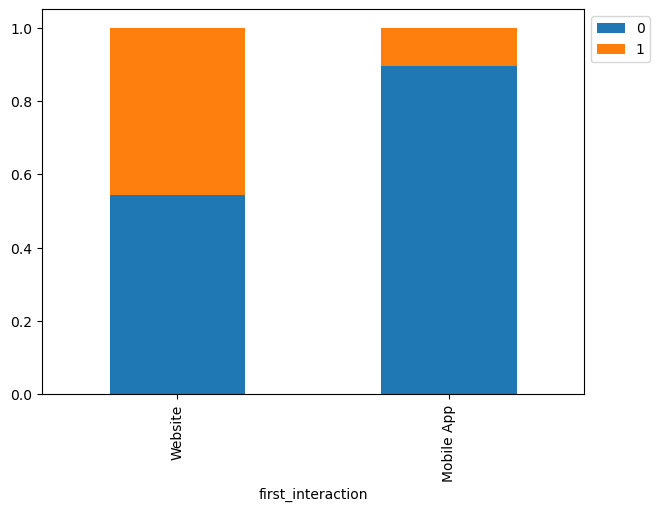

In [40]:
stacked_barplot(data,'first_interaction','status') 

**Observations :**

- 45.6% among the leads who had Website as first_interaction were converted to paid customers.
- 10.53% among the leads who had Mobile App as first_interaction were converted to paid customers.

**Leads having Website as first_interaction had high proportion in terms of convertion to paid customers.**

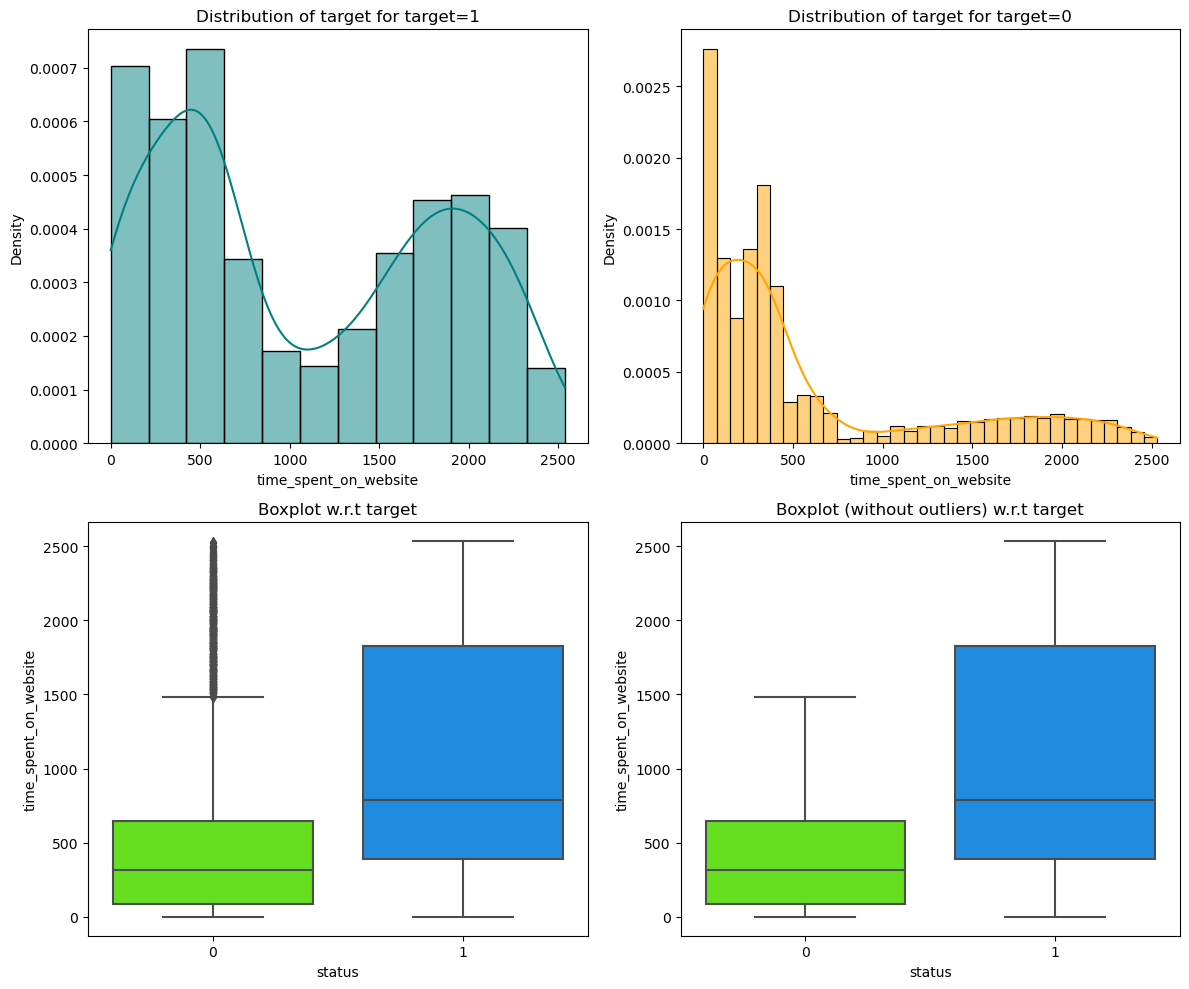

In [41]:
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

In [42]:
# checking the median value
data.groupby(["status"])["time_spent_on_website"].median()

status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

**Observations**
- The leads converted to paid customers spent much more time on website.The median time_spent_on_website among the converted leads is 789 while the madian time_spent_on_website among the non_converted leads is only 317.

**Let's do a similar analysis for time spent on website and page views per visit.**

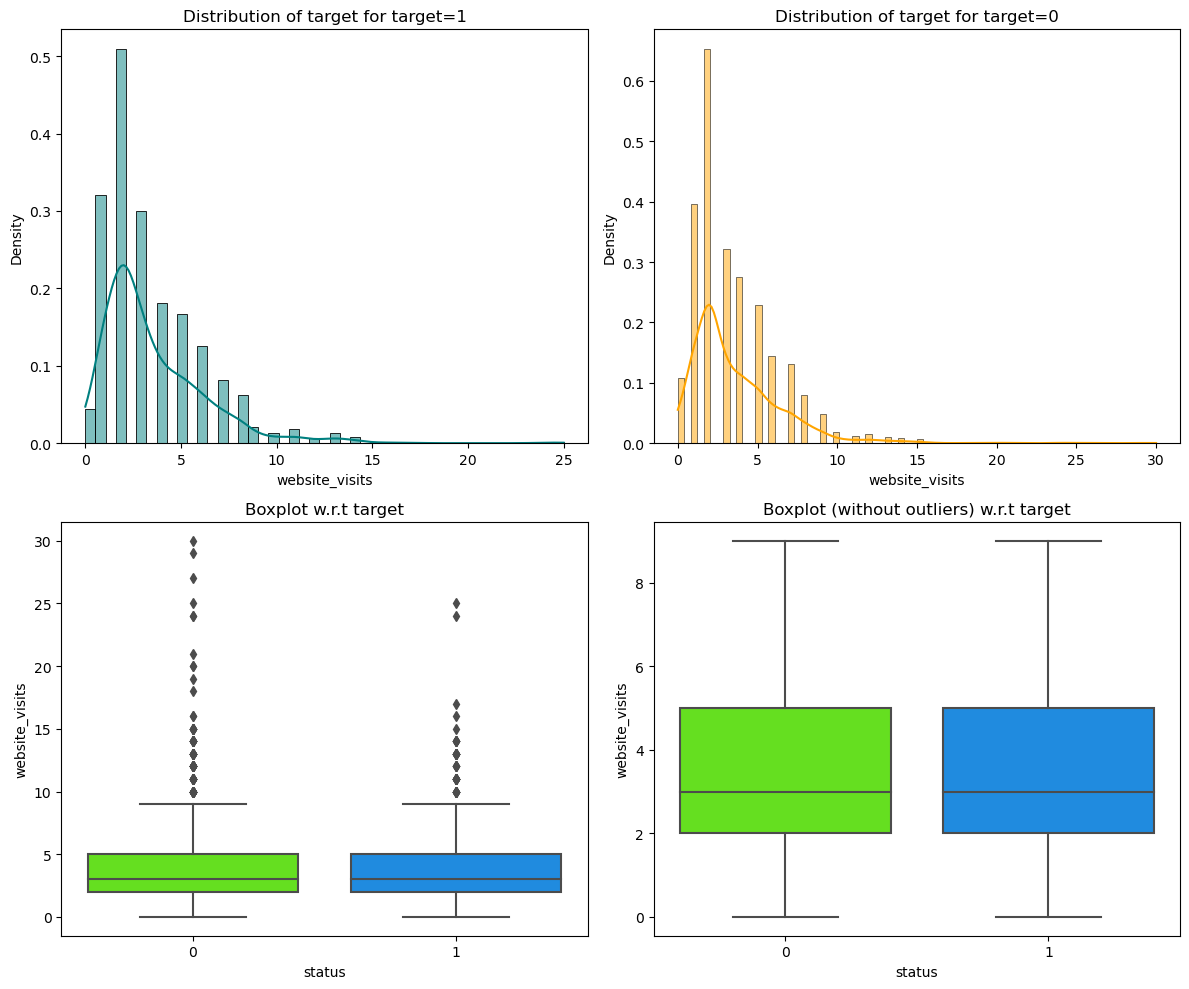

In [43]:
distribution_plot_wrt_target(data,'website_visits','status' ) 

In [44]:
# checking the median value
data.groupby(["status"])["website_visits"].median()

status
0   3.00000
1   3.00000
Name: website_visits, dtype: float64

**Observations**
- The median websites_visits is similar among the leads converted or not.

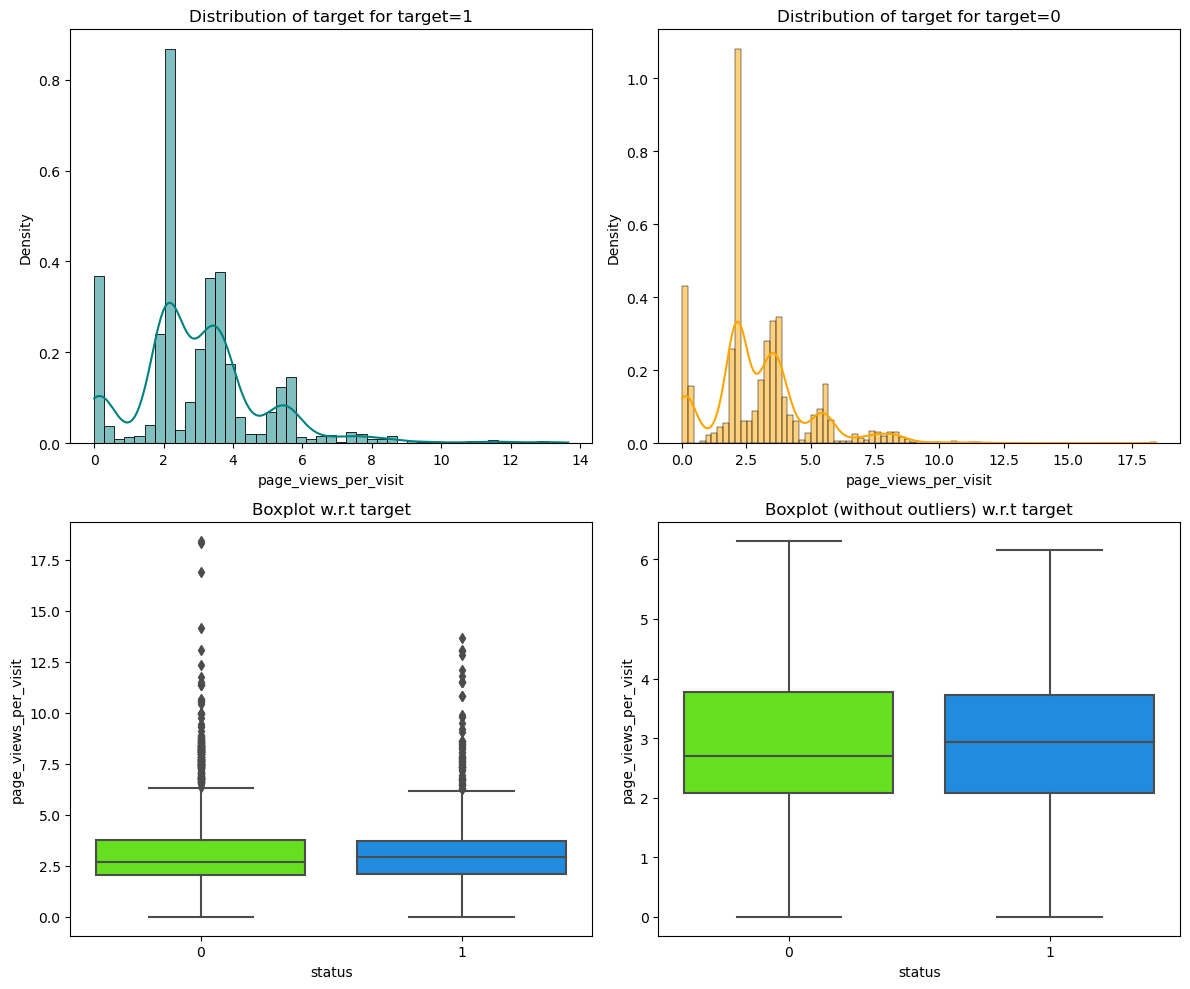

In [45]:
distribution_plot_wrt_target(data,'page_views_per_visit','status') 

In [46]:
# checking the median value
data.groupby(["status"])["page_views_per_visit"].median()

status
0   2.70600
1   2.93500
Name: page_views_per_visit, dtype: float64

**Observations**
- The median page_views_per_visit is similar among the leads converted or not.

**People browsing the website or the mobile app are generally required to create a profile by sharing their personal details before they can access more information. Let's see if the profile completion level has an impact on lead status**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------
status                  0       1
profile_completed                
High              0.58216 0.41784
Medium            0.81124 0.18876
Low               0.92523 0.07477


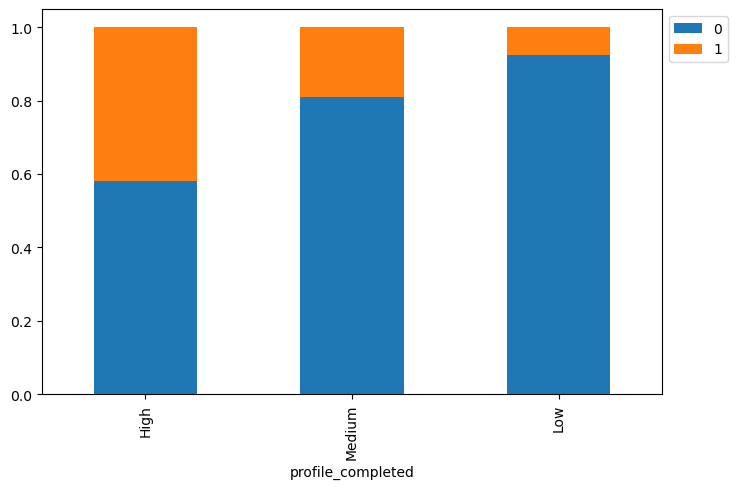

In [47]:
stacked_barplot(data,'profile_completed','status')

**Observations**
- 41.78% among the high profile_completed leads were converted.
- 18.9% among the medium profile_completed leads were converted.
- only 7.48% among the low profile_completed leads were converted.

**After a lead shares their information by creating a profile, there may be interactions between the lead and the company to proceed with the process of enrollment. Let's see how the last activity impacts lead conversion status**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------
status                 0       1
last_activity                   
Website Activity 0.61545 0.38455
Email Activity   0.69666 0.30334
Phone Activity   0.78687 0.21313


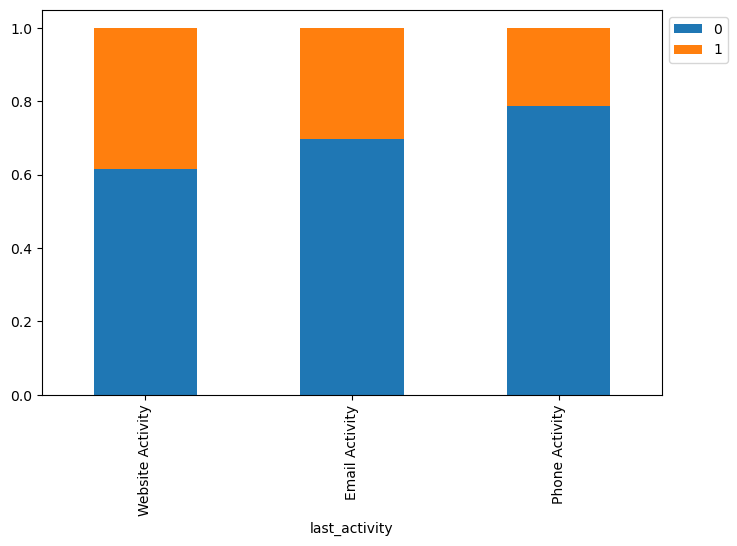

In [48]:
stacked_barplot(data,'last_activity','status') 

**Observations**
- 38.46% among the last_activity_Website leads were converted.
- 30.33% among the last_activity_Email leads were converted.
- 21.31% among the last_activity_Phone leads were converted.

**last_activity_Website leads had higher proportion of convertion.**

**Let's see how advertisement and referrals impact the lead status**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------
status                  0       1
print_media_type1                
Yes               0.68008 0.31992
No                0.70401 0.29599


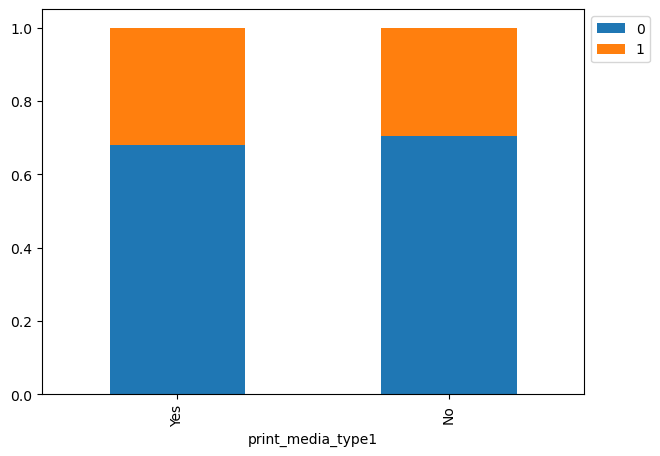

In [49]:
stacked_barplot(data,'print_media_type1','status') 

**Observations**

- 32% among the leads who had seen the ad in the Newspaper were converted.
- 29.6% among the leads who hadn't seen the ad in the Newspaper were converted.

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------
status                  0       1
print_media_type2                
Yes               0.67811 0.32189
No                0.70267 0.29733


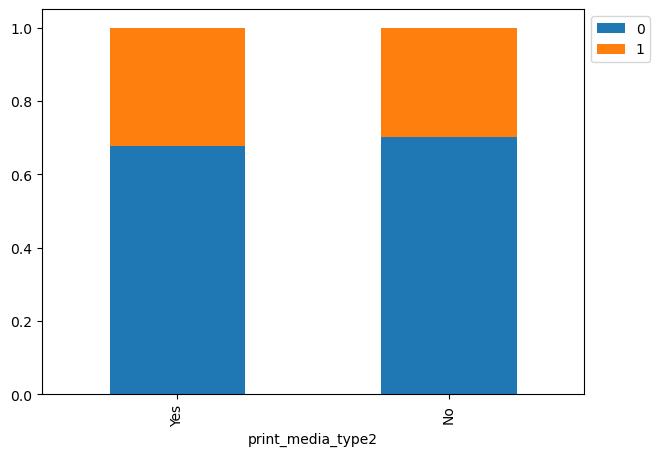

In [50]:
stacked_barplot(data,'print_media_type2','status')

**Observations**

- 32.19% among the leads who had seen the ad in the Magazine were converted.
- 29.73% among the leads who hadn't seen the ad in the Magazine were converted.

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------
status              0       1
digital_media                
Yes           0.68121 0.31879
No            0.70404 0.29596


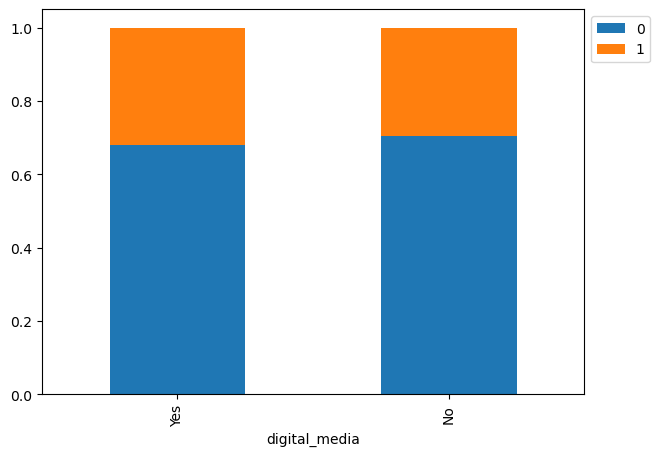

In [51]:
stacked_barplot(data,'digital_media','status') 

**Observations**

- 31.88% among the leads who had seen the ad in the digital_platforms were converted.
- 29.6% among the leads who hadn't seen the ad in the digital_platforms were converted.

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------
status                     0       1
educational_channels                
No                   0.69798 0.30202
Yes                  0.72057 0.27943


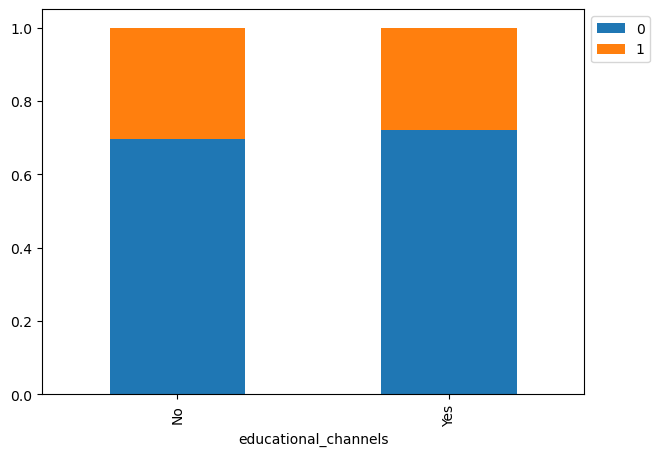

In [52]:
stacked_barplot(data,'educational_channels','status')

**Observations**

- 30.2% among the leads who hadn't heard about ExtraaLearn in educational channels were converted.
- 27.94% among the leads who had heard about ExtraaLearn in educational channels were converted.

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------
status         0       1
referral                
Yes      0.32258 0.67742
No       0.70923 0.29077


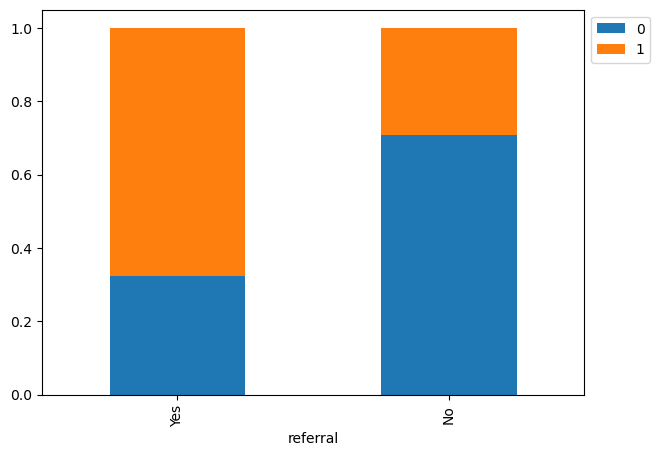

In [53]:
stacked_barplot(data,'referral','status') 

**Observations :**

- 67.7% among the leads who had heard about ExtraaLearn by reference were converted.
- 29.1% among the leads who hadn't heard about ExtraaLearn by reference were converted.

**The reference is a efficient way to convert the leads into paid customer**

**Observations from Bivariate Analysis**
- 

### Outlier Check

- Let's check for outliers in the data.

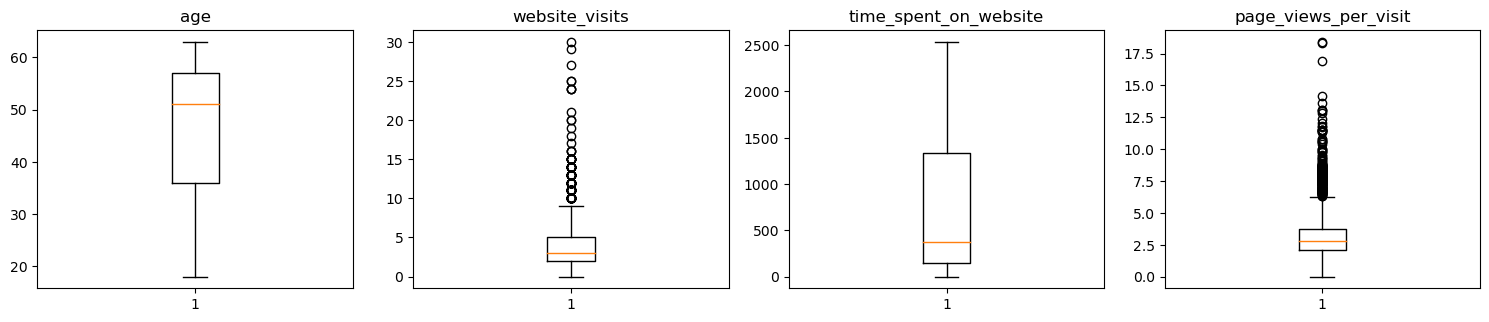

In [54]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**
- There are outliers in website_visits and page_views_per_visit.
- We will make models like K-NN, Decision Tree and Random Forest. As these models are not sensitives to the outliers. we can keep this ourliers inside the dataset.

### Data Preparation for modeling

- We want to predict which lead is more likely to be converted.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

**Outlier treatment**

In [55]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75) # 75th quantile
    IQR=Q3-Q1 # IQR Range
    Lower_Whisker =Q1-1.5*IQR  #define lower whisker
    Upper_Whisker = Q3+1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [192]:
cols_num=['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
data_without_outlier = treat_outliers_all(data,cols_num)

In [193]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X_clean =data_without_outlier.drop(["status"], axis=1)
# Create dummy variables for the categorical variables
X_clean = pd.get_dummies(X_clean, drop_first = True)    
Y_clean = data_without_outlier['status'] #  define the dependent (target) variable

In [194]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X =data.drop(["status"], axis=1)
# Create dummy variables for the categorical variables
X = pd.get_dummies(X, drop_first = True)    
Y = data['status'] #  define the dependent (target) variable


In [195]:
# Scaling the data without outliers
sc = StandardScaler()

X_clean_scaled = sc.fit_transform(X_clean)

X_clean_scaled = pd.DataFrame(X_clean_scaled, columns = X_clean.columns)

In [166]:
# Splitting the data without outlier and scaled, to be used by models sensitive to outliers and data scale like QDA, KNN
X_train_clean_scaled, X_test_clean_scaled, y_train_clean_scaled, y_test_clean_scaled = train_test_split(X_clean_scaled, Y_clean, test_size = 0.3, random_state = 1, stratify = Y)

In [167]:
# Splitting the arigianl data, to be used by models not sensitive to outliers or data scale like Decision Tree, Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 1, stratify = Y)

In [168]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
status
0   0.70136
1   0.29864
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0   0.70159
1   0.29841
Name: proportion, dtype: float64


## **Building Classification Models**

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [169]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

### **Quadratic Discriminant Analysis**

Quadratic discriminant analysis (QDA) is a probabilistic parametric classification technique that represents an evolution of LDA for nonlinear class separations. QDA, like LDA, is based on the hypothesis that the probability density distributions are multivariate normal but, in this case, the dispersion is not the same for all of the categories.

In [170]:
# Fitting QDA model
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train_clean_scaled, y_train_clean_scaled)

QuadraticDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      2264
           1       0.69      0.78      0.74       964

    accuracy                           0.83      3228
   macro avg       0.80      0.82      0.81      3228
weighted avg       0.84      0.83      0.83      3228



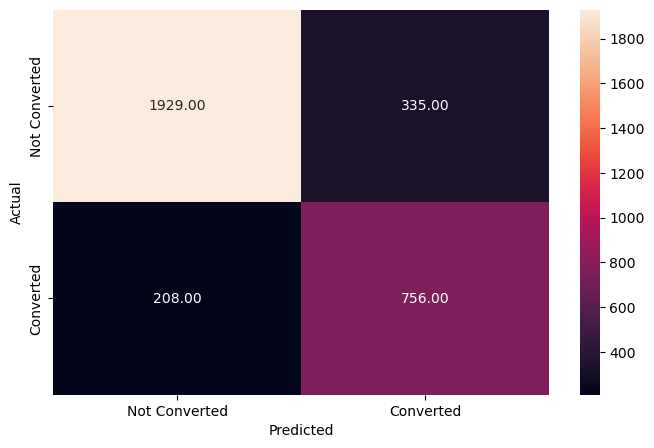

In [171]:
# Checking model performance on the training data
y_pred_qda_train = qda.predict(X_train_clean_scaled)
metrics_score(y_train_clean_scaled, y_pred_qda_train)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       971
           1       0.69      0.77      0.73       413

    accuracy                           0.83      1384
   macro avg       0.79      0.81      0.80      1384
weighted avg       0.83      0.83      0.83      1384



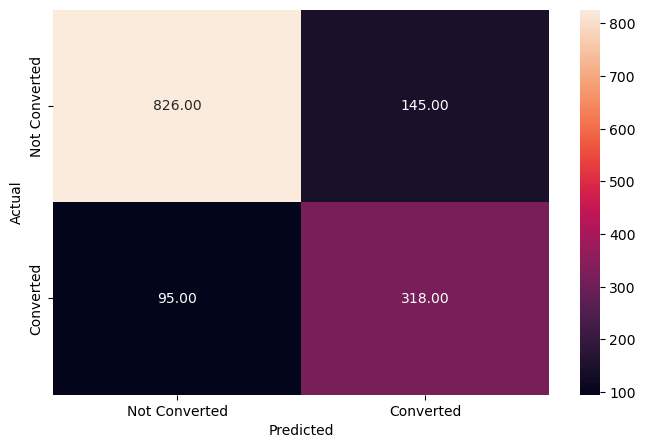

In [173]:
y_pred_qda_test = qda.predict(X_test_clean_scaled)
metrics_score(y_test_clean_scaled, y_pred_qda_test )

**Observations:**

- The recall score on training data is 0.78 and 0.77 on the test data.
- As the recall is relatively low, this model will not perform well in differentiating out leads who have a high probability to be converted to paid customer, means it can not help the company to maximize the paid customers convertion.

### **K-Nearest Neighbors (K-NN)**

**But before actually building the model, we need to identify the value of K to be used in K-NN. We will perform the following steps for the same.**

- For every value of K (from 1 to 15), split the training set into a new train and validation sets (30 times)
- Scale the training data and the validation data
- Take the average of the error on these training and the validation sets for each value of K
- Plot the average train vs validation error for all Ks 
- Choose the optimal K from the plot where the two errors are comparable

In [174]:
knn = KNeighborsClassifier()

# We select the optimal value of K for which the error rate is the least in the validation data
# Let us loop over a few values of K to determine the optimal value of K

train_error = []

test_error = []

knn_many_split = {}

error_df_knn = pd.DataFrame()

features = X.columns

for k in range(1, 15):
    train_error = []
    
    test_error = []
    
    lista = []
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #This loop runs 20 times, 
    #representing 20 different random splits of your training data into training and validation sets.
    for i in range(20):
        
        x_train_new, x_val, y_train_new, y_val = train_test_split(X_clean_scaled, Y_clean, test_size = 0.30)

        # Fitting K-NN on the training data
        knn.fit(x_train_new, y_train_new)
        
        # Calculating error on the training data and the validation data
        train_error.append(1 - knn.score(x_train_new.values, y_train_new.values)) 
        
        test_error.append(1 - knn.score(x_val.values, y_val.values))
    
    lista.append(sum(train_error)/len(train_error))
    
    lista.append(sum(test_error)/len(test_error))
    
    knn_many_split[k] = lista

knn_many_split

{1: [0.0003097893432465637, 0.22637283236994224],
 2: [0.11287174721189594, 0.20903179190751447],
 3: [0.11263940520446096, 0.19841040462427745],
 4: [0.13581164807930607, 0.19418352601156066],
 5: [0.13328686493184633, 0.1844291907514451],
 6: [0.14363382899628246, 0.18536849710982659],
 7: [0.14030359355638164, 0.17254335260115605],
 8: [0.14793990086741018, 0.1830563583815029],
 9: [0.14408302354399008, 0.17218208092485549],
 10: [0.15226146220570014, 0.17807080924855492],
 11: [0.14851301115241639, 0.17359104046242774],
 12: [0.15554522924411396, 0.1791907514450867],
 13: [0.15157992565055767, 0.1711705202312139],
 14: [0.15535935563816605, 0.17919075144508667]}

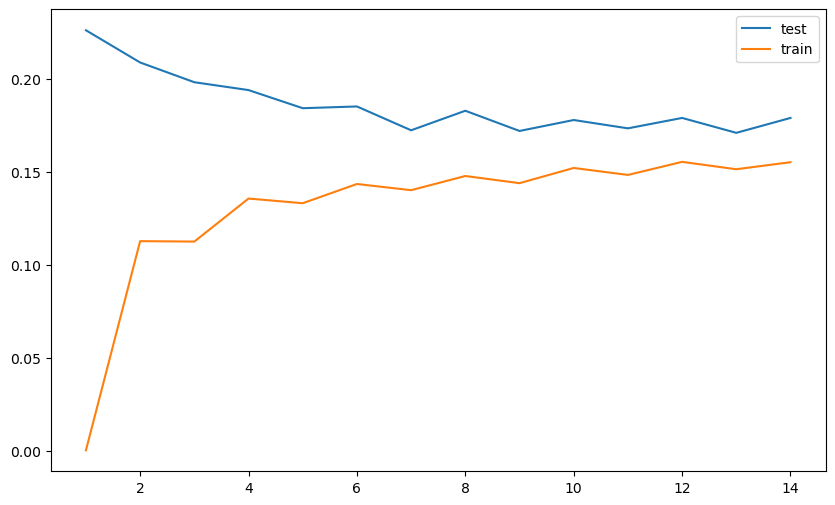

In [175]:
kltest = []

vltest = []

for k, v in knn_many_split.items():
    kltest.append(k)
    
    vltest.append(knn_many_split[k][1])

kltrain = []

vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    
    vltrain.append(knn_many_split[k][0])

# Plotting K vs Error
plt.figure(figsize = (10, 6))

plt.plot(kltest, vltest, label = 'test' )

plt.plot(kltrain, vltrain, label = 'train')

plt.legend()

plt.show()

**Observations:**
- We can see that the test error (error on the validation data) is more or less similar for K greater than or equal to **5**. But the training error keeps increasing with increasing K.
- This implies that we would get a lower train and test error if we choose **K = 5**. Also, if we choose a higher value of K, the model would get biased due to the imbalance in the dataset.
- So, let's fit the K-NN model with **K=5** on the entire training set.

In [176]:
# Convert DataFrames to numpy arrays
x_train_new = X_train_clean_scaled.values
x_val = X_test_clean_scaled.values
y_train_new = y_train_clean_scaled.values
y_val = y_test_clean_scaled.values

In [177]:
# Define K-NN model

knn = KNeighborsClassifier(n_neighbors = 5)
# Fitting data to the K-NN model

knn.fit(x_train_new,y_train_new)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2264
           1       0.82      0.74      0.78       964

    accuracy                           0.87      3228
   macro avg       0.86      0.83      0.84      3228
weighted avg       0.87      0.87      0.87      3228



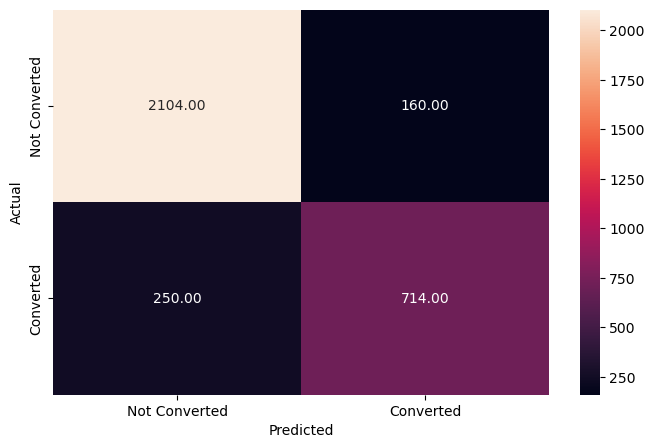

In [178]:
# Checking performance on the training data
y_pred_knn_train = knn.predict(x_train_new)
metrics_score(y_train_new,y_pred_knn_train)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       971
           1       0.72      0.64      0.68       413

    accuracy                           0.82      1384
   macro avg       0.79      0.77      0.78      1384
weighted avg       0.81      0.82      0.82      1384



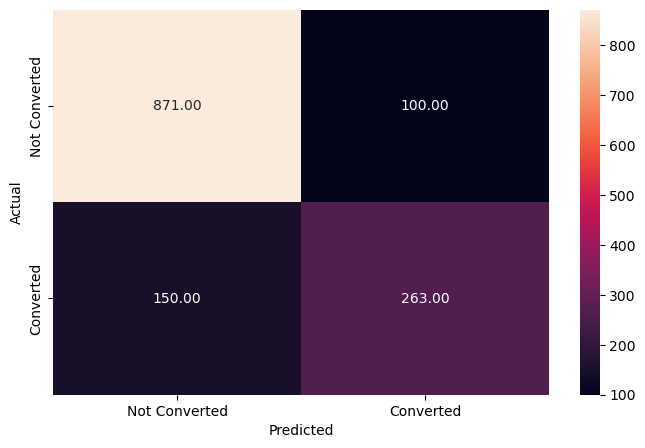

In [179]:
# Checking performance on the training data
y_pred_knn_test = knn.predict(x_val)
metrics_score(y_val,y_pred_knn_test)

**Observation**

- Compared to the QDA model, this KNN model is giving better precision score on train and test data, but lower recall score. As it is the recall score who is more important, this KNN model is not performing well.

## Decision Tree

### Building Decision Tree Model

In [189]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state = 1,class_weight = {0: 0.3, 1: 0.7})

d_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

#### Checking model performance on training set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



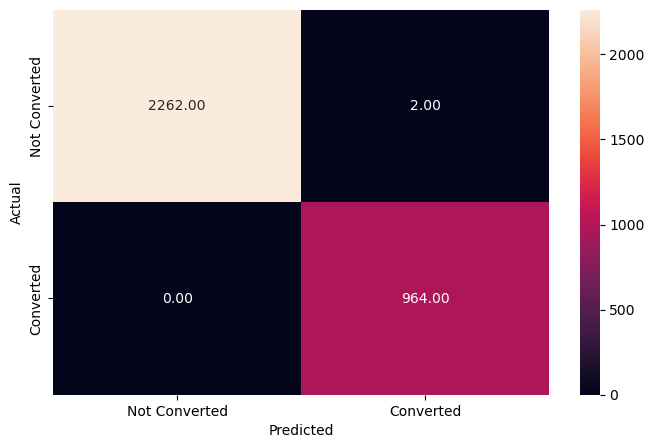

In [190]:
# Checking performance on the training data
y_pred_dtree_train = d_tree.predict(X_train)
metrics_score(y_train,y_pred_dtree_train )



**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       971
           1       0.66      0.64      0.65       413

    accuracy                           0.79      1384
   macro avg       0.75      0.75      0.75      1384
weighted avg       0.79      0.79      0.79      1384



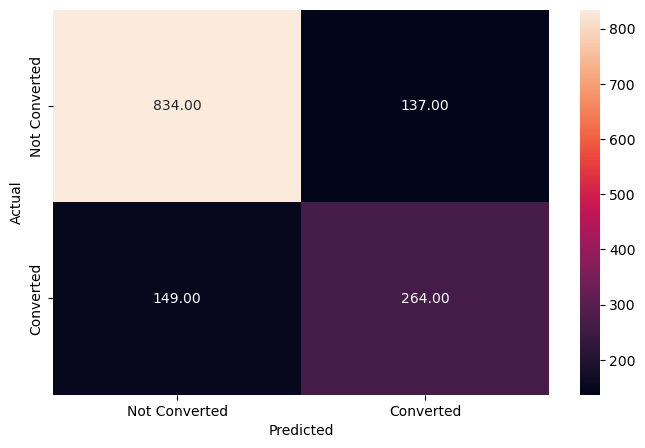

In [201]:
# Checking performance on the testing data
y_pred_dtree_test = d_tree.predict(X_test)

metrics_score(y_test,y_pred_dtree_test)

**Observations:**

- This Decision Tree model is giving 100% on all scores on training data but the scores decrease a lot on test data.

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is approximately the opposite of the imbalance in the original data. 

**This would tell the model that 1 is the important class here.**

In [130]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

#### Checking model performance on train and test set

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



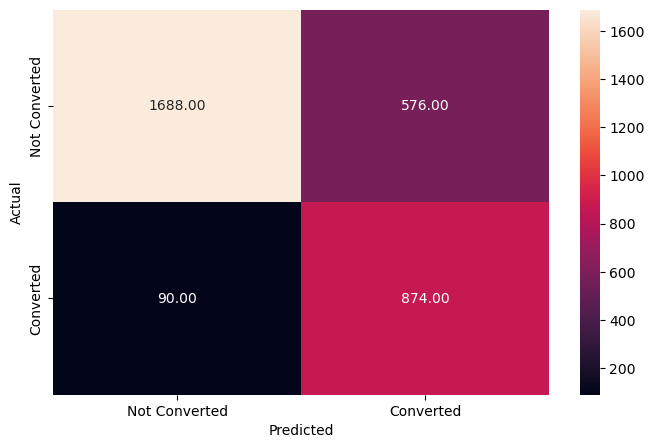

In [134]:
# Checking performance on the training data
y_pred_dtree_tuned_train = d_tree_tuned.predict(X_train)

metrics_score(y_train,y_pred_dtree_tuned_train)

**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.70       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



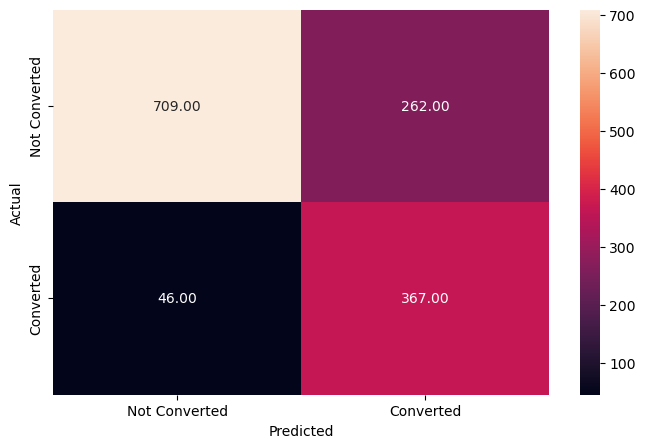

In [196]:
# Checking performance on the testing data
y_pred_dtree_tuned_test = d_tree_tuned.predict(X_test)

metrics_score(y_test,y_pred_dtree_tuned_test )

In [136]:
print(grid_obj.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}


**Observations:**
- After the tuning, the scores have gone down on the training data, but the recall score has gone up from **0.64 to 0.89** on test data. As the recall score is more important, this can be the best model that the company can use.
- The best hyperparameters used are : {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}.

### Visualizing the Decision Tree

**Let's visualize the tuned decision tree** and observe the decision rules:

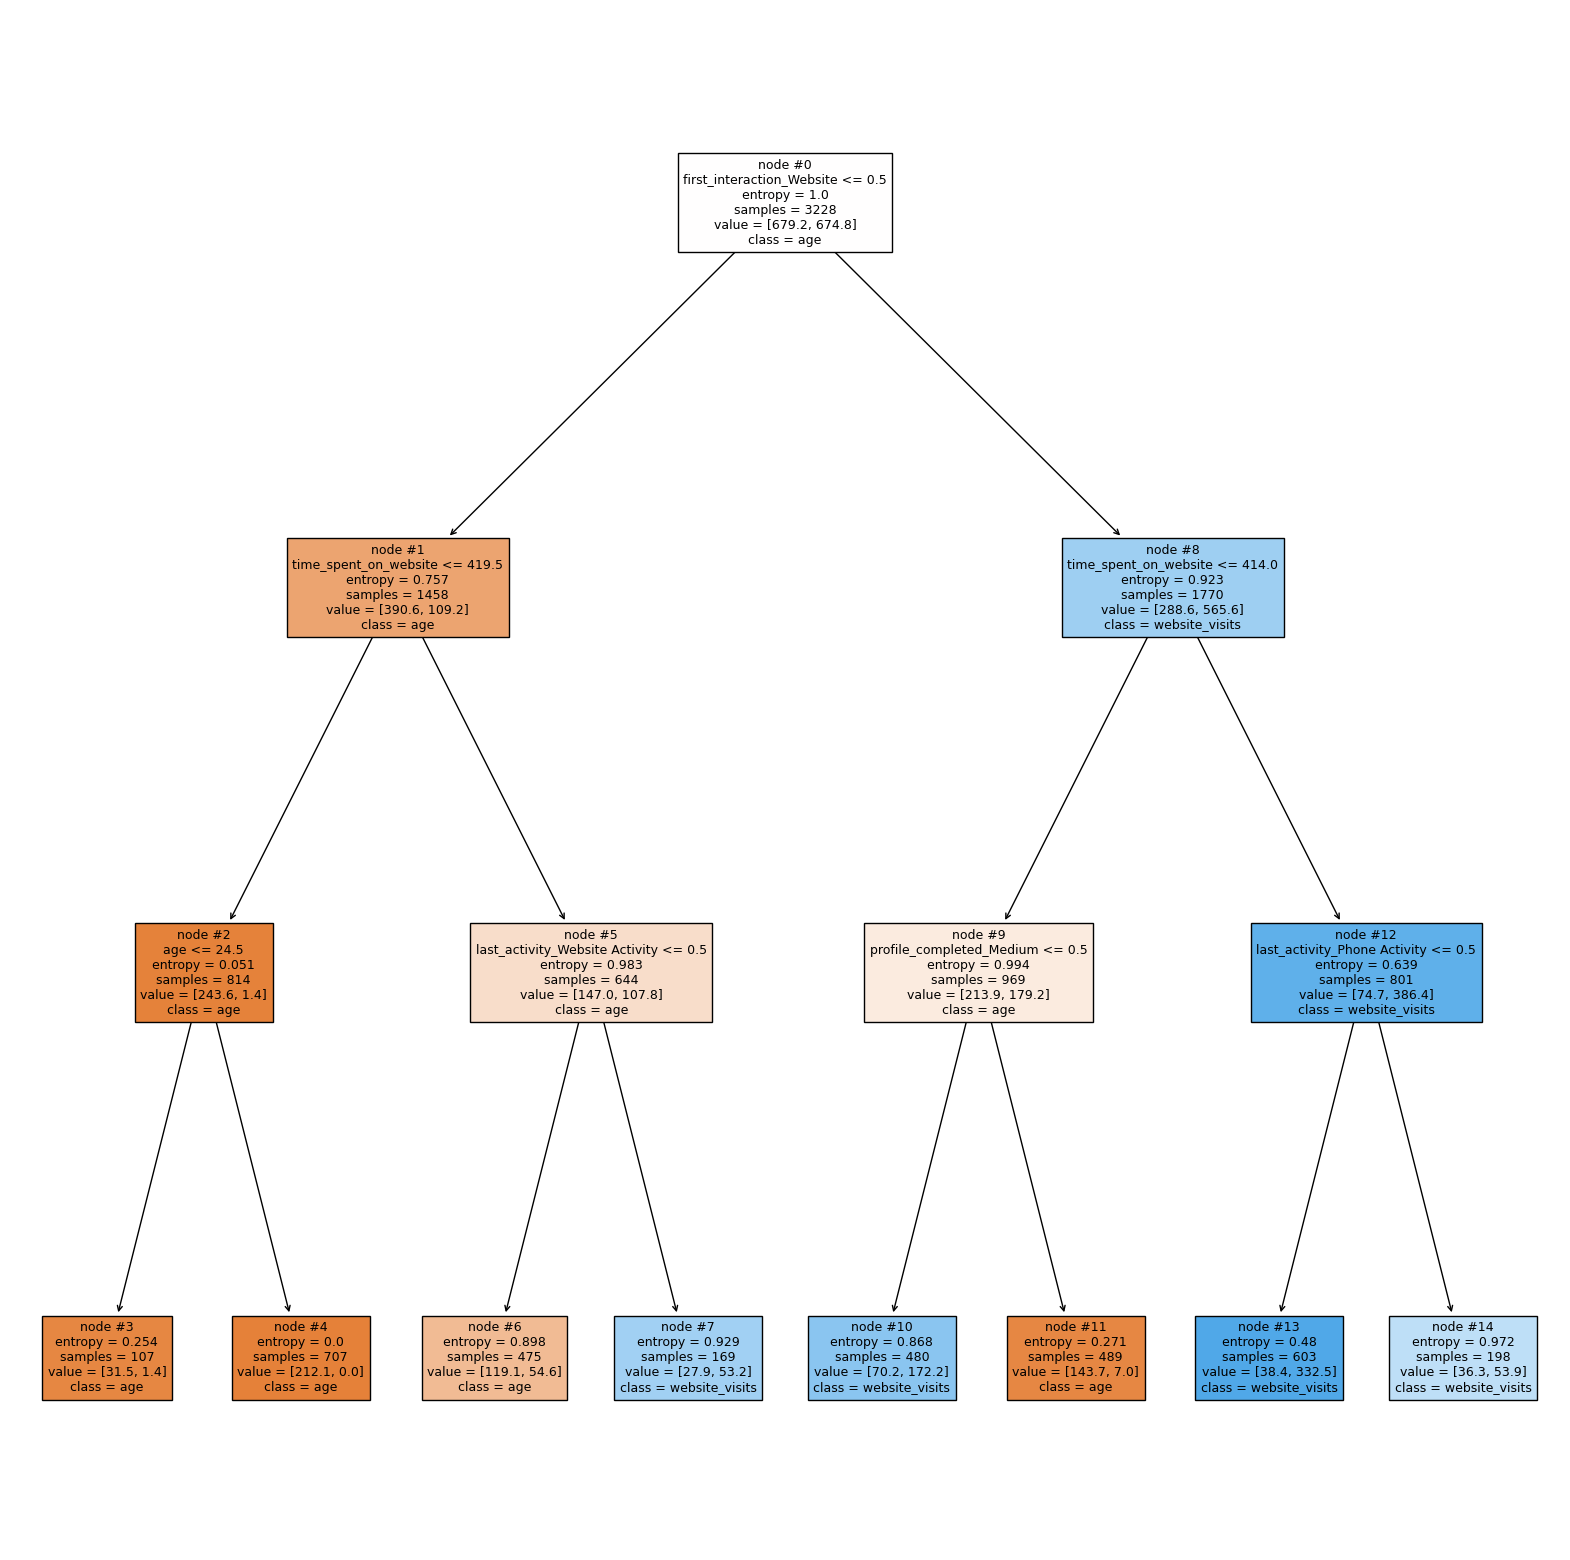

In [138]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = features)

plt.show()

**Note:** Blue leaves represent the converted leads, i.e., **y[1]**, while the orange leaves represent the not converted leads, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Let's look at the feature importance** of the tuned decision tree model

In [139]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.36555
first_interaction_Website      0.31348
profile_completed_Medium       0.23370
last_activity_Phone Activity   0.04840
last_activity_Website Activity 0.03201
age                            0.00685
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


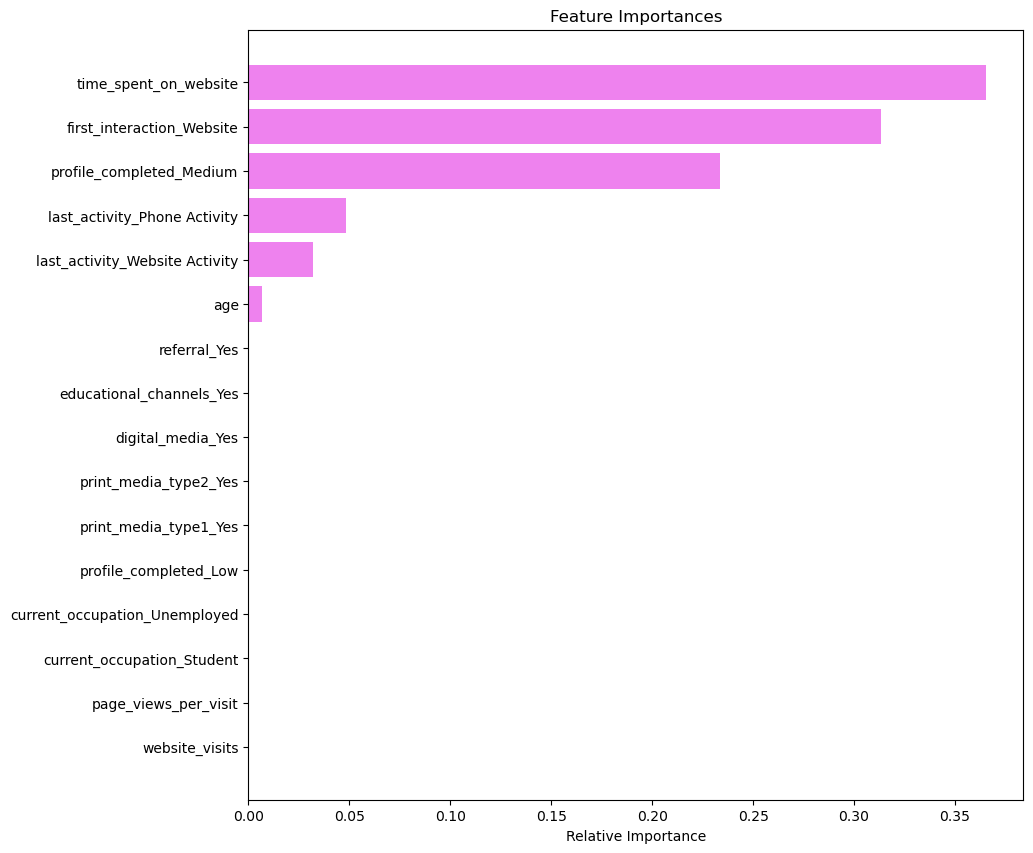

In [140]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations :**
- **Time spent on the website, first_interaction_website, profile_completed_Medium are the most important features** who drive the convertion.

Now, let's build another model - **a random forest classifier.**

### **Random Forest Classifier**

### Building Random Forest Model

In [158]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 1, class_weight = {0: 0.3, 1: 0.7})

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

**Let's check the performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



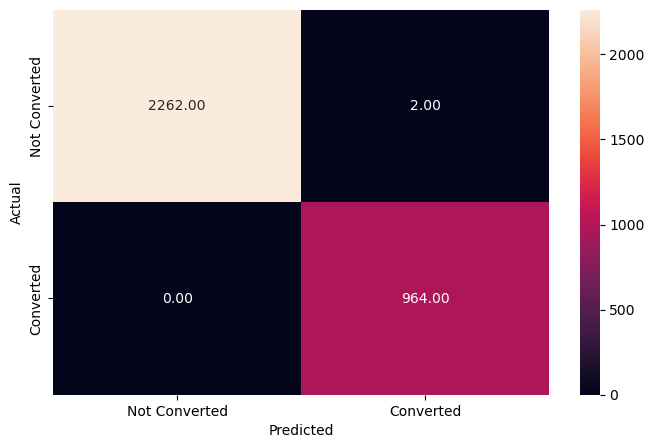

In [159]:
# Checking performance on the training data
y_pred_rf_train = rf_estimator.predict(X_train)

metrics_score(y_train,y_pred_rf_train)

**Let's check the performance on the testing data**

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       971
           1       0.79      0.72      0.75       413

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



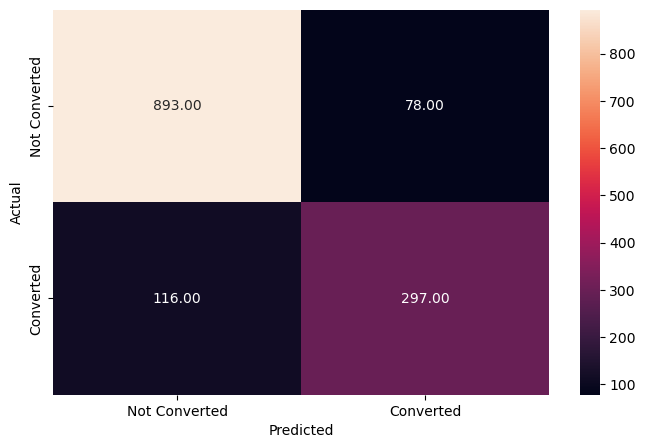

In [160]:
# Checking performance on the testing data
y_pred_rf_test = rf_estimator.predict(X_test)

metrics_score(y_test,y_pred_rf_test )

In [144]:
print(rf_estimator.n_estimators)
print(rf_estimator.max_features)
print(rf_estimator.class_weight)
print(rf_estimator.criterion)

100
sqrt
{0: 0.3, 1: 0.7}
gini


**Observations:**
- The Random Forest is giving a 100% score for all metrics on the training dataset. There is an overfitting problem. The model gets lower performance on test dataset.

- The model gives a 0.72 recall score on dataset which is lower than the recall score given by the Tuned Decision Tree.

**Let's see if we can get a better model by tuning the random forest classifier**

### **Random Forest Classifier - Hyperparameter Tuning**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**. 

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [145]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(random_state = 1, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {  "n_estimators": [ 100, 105],
                "max_features": [0.8,'sqrt'],
                "max_samples": [0.9],
                'criterion' : ['gini','entropy']
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)
grid_obj =  grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned =grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_features=0.8, max_samples=0.9, n_estimators=105,
                       random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



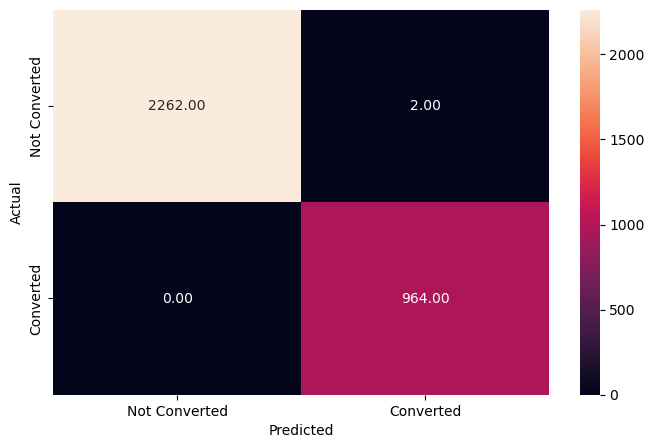

In [146]:
# Checking performance on the training data
y_pred_rf_tuned_train =rf_estimator_tuned.predict(X_train)
metrics_score(y_train,y_pred_rf_tuned_train)

**Let's check the model performance on the test data**

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.78      0.73      0.75       413

    accuracy                           0.86      1384
   macro avg       0.83      0.82      0.83      1384
weighted avg       0.85      0.86      0.86      1384



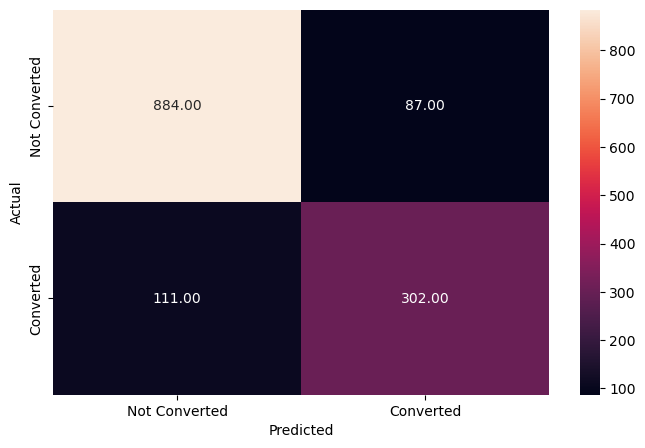

In [147]:
# Checking performance on the test data
y_pred_rf_tuned_test = rf_estimator_tuned.predict(X_test)

metrics_score(y_test,y_pred_rf_tuned_test)

In [148]:
print(grid_obj.best_params_)

{'criterion': 'entropy', 'max_features': 0.8, 'max_samples': 0.9, 'n_estimators': 105}


**Observations :**

- The tuned model is also slightly overfitting the training dataset, but **it shows a good performance on the test dataset.**
- **The recall score for class 1 has improved with a decrease in precision score**, but it is still low than the recall recore given by the Tuned Decision Tree model.
- The best hyperparameters used are : {'criterion': 'entropy', 'max_features': 0.8, 'max_samples': 0.9, 'n_estimators': 105}

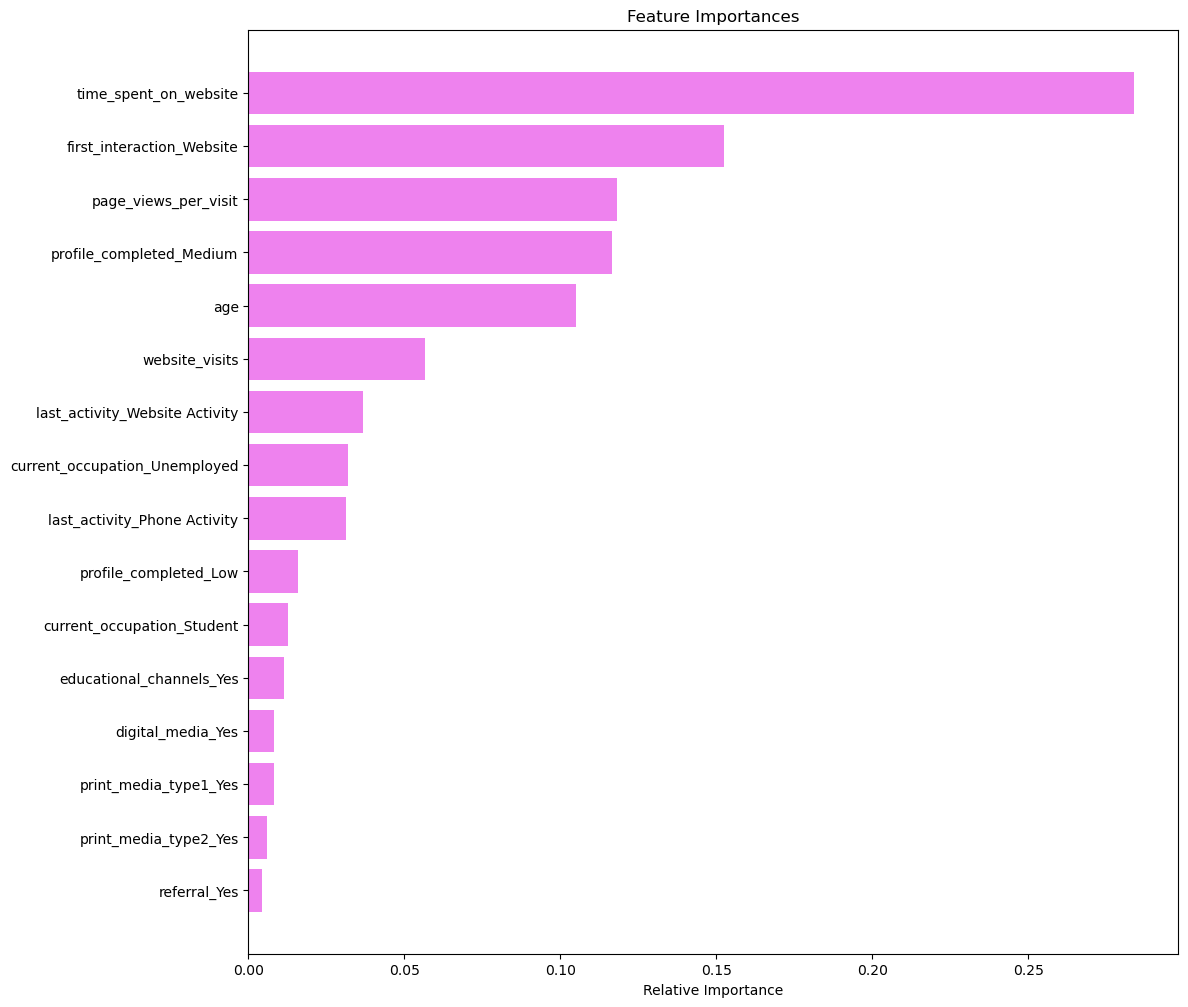

In [149]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations :**
- **Time spent on the website, first_interaction_website, page_views_per_visit, profile_completed_Medium, age are the most important features** who drive the convertion.

### **Comparing Model Performances**

In [197]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    X_train=X_train.values
    X_test=X_test.values
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [198]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    X_train=X_train.values
    X_test=X_test.values
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [199]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    X_train=X_train.values
    X_test=X_test.values
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores


In [200]:
# Make the list of all the model names 

models = [ qda, knn, d_tree,d_tree_tuned,rf_estimator, rf_estimator_tuned ]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [154]:
comparison_frame = pd.DataFrame({'Model':['QDA',
                                          'K-NN',
                                          'Decision Tree', 
                                          'Decision Tree Tuned',
                                         'Random Forest',
                                         'Random Forest Tuned'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,QDA,0.29864,0.29841,1.00000,1.00000,0.29864,0.29841
1,K-NN,0.45632,0.47905,0.26971,0.27845,0.19832,0.21375
2,Decision Tree,0.99938,0.79335,1.00000,0.63923,0.99793,0.65835
3,Decision Tree Tuned,0.79368,0.77746,0.90664,0.88862,0.60276,0.58347
4,Random Forest,0.99938,0.85983,1.00000,0.71913,0.99793,0.79200
5,Random Forest Tuned,0.99938,0.85694,1.00000,0.73123,0.99793,0.77635


**Observations:**
- **Decision Tree Tuned** model gives the best recall score **0.89 on test data.** A high recall score model can predict a large portion of the true positive instances, minimizing false negatives. So this model can help the company to capture the majoraty of the leads likly to be converted to paid customer, and the campany can concentrate their resource on these leads. 


## **Conclusion and Recommendations**

## **Conclusion**

- As losing a potential customer is a greater loss, it is important to minimize the false negative value which means maximize the `Recall` value.
- The best model we have got is the **Tuned Decision Tree model** as it is the model who is giving the highest recall value **0.89** for class 1 on the test data.
- ExtraaLearn should use this model to predict the leads with high convertion probability.
- Time_spent_on_website, first_interaction_website, profile_completed_medium seem to be the most important drivers to predict the convertion.

## **Recommendations**

- The percentage of convertion among the professionals is 35.5%, and this population represents 56.7% among all the leads. ExtraaLearn should focus more on this population to convert more professional. On the contrary, the students population has low convertion rate (11.7%) and represents only 12% of the leads, which means that this population should not be prioritised.

- Time_spent_on_website is the most important driver of paid customer convertion.ExtraaLearn should focus more on the leads who spend more time on website.

- Compared to leads who had Mobile_App as first interaction, the leads with Website as first interaction had much higher percentage of convertion. ExtraaLearn should spend much resource to upgrade the website and orient new leads to the website.

- The leads who heard ExtraaLearn from a reference had much higher percentage of convertion : 67.7% vs 29%. But only 2% of the leads heard ExtraaLearn from a reference. The company should encourage the leads already converted to influence their entourage.

- The tuned Decision Dree Model (the chosen model) is giving a high recall score **0.89** however the precision score is only **0.58**. So this model will predict lead would be converted while in reality the lead would not, which means this model will push ExtraaLearn to spend resouces on false target. We can still try to tune this model to get higher precision score without impacting the recall score.